In [ ]:
from skimage import io
from matplotlib import pyplot as plt
import numpy as np

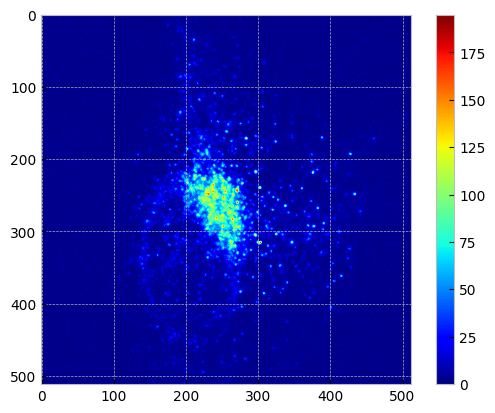

In [ ]:
# Task 1
img_data = plt.imread('golgi-movie_robert_frame_01_gray.jpg') #importing the first frame
plt.imshow(img_data, cmap='jet') #plotting intensity on blue to red based on pixel values
plt.colorbar()

type(img_data)=<class 'numpy.ndarray'>
img_data.shape=(512, 512)
img_data.min()=0
195
1678097


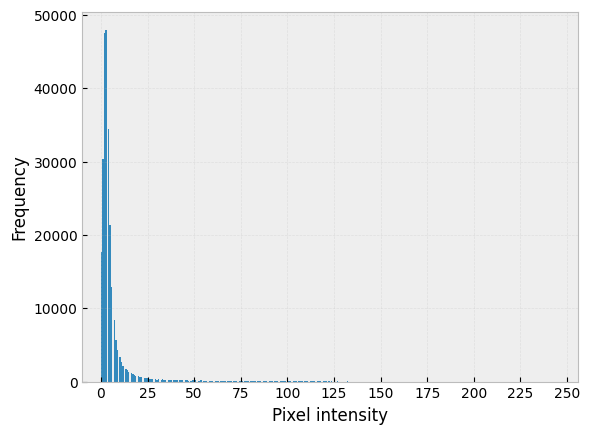

In [ ]:
# Task 2
print(f'{type(img_data)=}',
      f'{img_data.shape=}', #dimension of image, 2D image. 512 x 512 pixels
      f'{img_data.min()=}', #tells us the dimmest pixel, which is 0, likely background noise
      f'{img_data.max()}', #brightest pixel value
      f'{img_data.sum()}', #sums all the overall brightness of pixels in the image
      sep='\n')

img_data = img_data.flatten() #converting it to 1d array
plt.hist(img_data, bins = 256)
plt.xlim(-10, 256)

ticks = [i for i in range(0, 256, 25)] #using list comprehension, start 0, end 256 in intervals of 25

plt.xticks(ticks) #setting x intervals
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.grid(alpha = 0.25)
plt.show()

In [ ]:
# Task 3
total_fluorescence = [] #empty list for the loop to append into everytime it iterates

for i in range(1, 18): #since the file is named 01 - 17, use range(). But, cannot factor in the leading zero of single numbers.
    img = io.imread(f'golgi-movie_robert_frame_{i:02}_gray.jpg') #0 refers to adding leading zeros if needed, and 2 specifies the minimum character in the number which is 2. single digit no. will have leading zeros added to it.
    total_fluorescence.append(img.sum()) #since the graph Y axis uses total fluorescence signal, sum is most appropriate. After it calculates the sum, add it to total_fluorescence list

print(total_fluorescence) #sanitary check to see if my function works and forms a complete list of 17 values

[1678097, 1635644, 1816652, 1777037, 1747933, 1689746, 1651677, 1603658, 1484451, 1413813, 1339107, 1287205, 1223687, 1170396, 1123362, 1057297, 1030133]


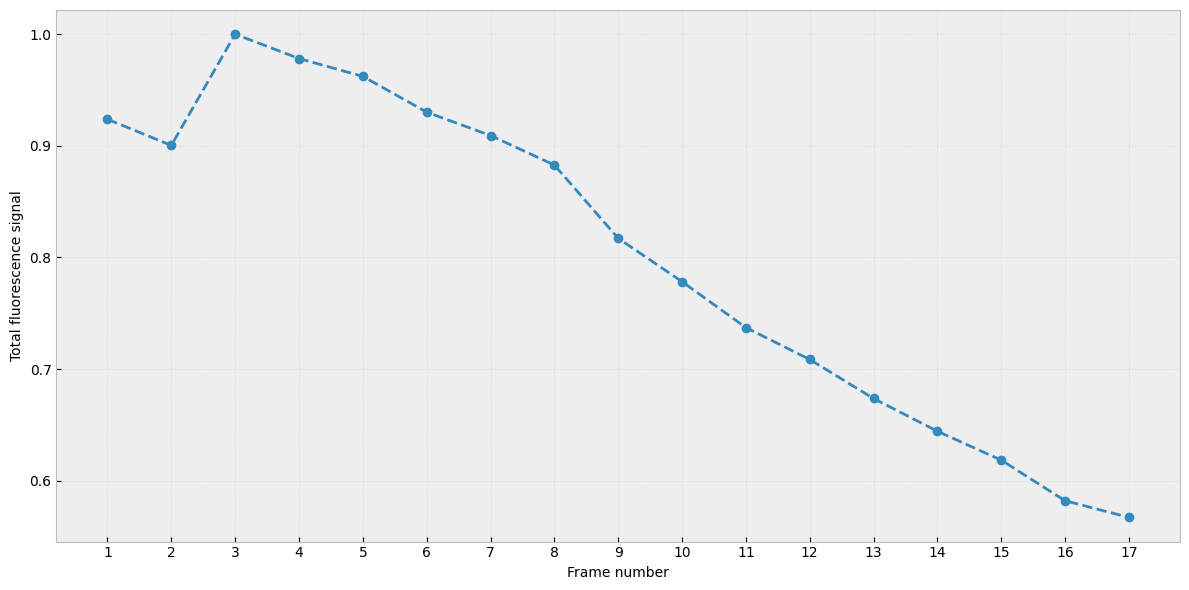

In [ ]:
# Task 3 (Continued)
x = range(1,18)
y = total_fluorescence / max(total_fluorescence) #Normalised to the img with the highest total brightness, as the highest datapoint = 1

#plotting segment
plt.figure(figsize = (12, 6)) #setting the figure size, has to be before plt.plot
plt.plot(x, y, linestyle = 'dashed', marker = 'o') #marker is the data point, marked as circle.

#Labels & aesthetics
plt.xticks(x) #this makes it show every tick in X axis
plt.xlabel('Frame number', fontsize = 10)
plt.ylabel('Total fluorescence signal', fontsize = 10)
plt.grid(alpha = .25)

plt.tight_layout()
plt.show()

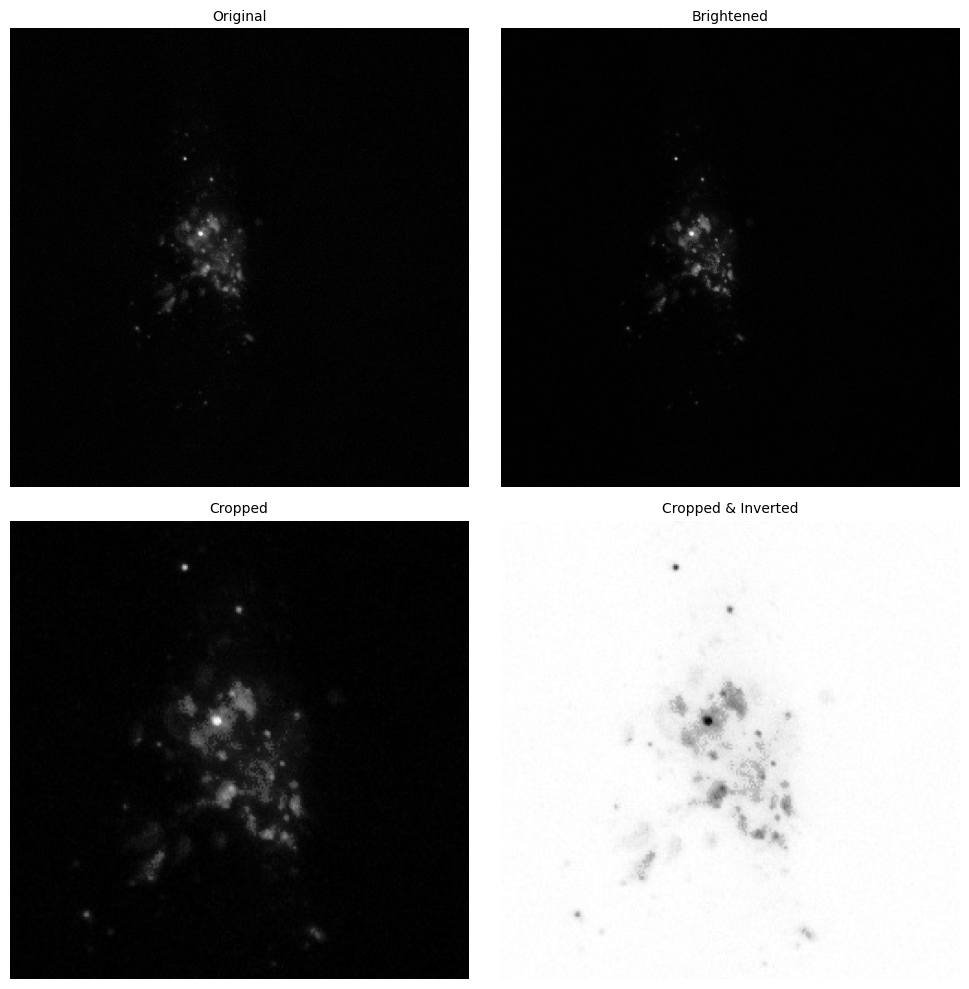

In [ ]:
# Task 4
img = plt.imread('golgi-movie_robert_frame_17_gray.jpg') #reads the image and returns as numpy array
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#assigning them into their 2D array position
ax_original = ax[0, 0]
ax_brightened = ax[0, 1]
ax_cropped = ax[1, 0]
ax_cropped_inverted = ax[1, 1]

#Plotting
ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title('Original', fontsize = 10)
ax[0, 0].axis('off') #removing axis for this subplot

#For brightening of img
brightened_img = img.astype(np.float32) #converting uint8 to float32, so can do masking. uint8 result will exceed 255, leading to error
mask = brightened_img > 50
brightened_img[mask] = brightened_img[mask] * 1.5 #if values >50, *1.5 and replace its original value in brightened_img
#numpy.where()

ax[0, 1].imshow(brightened_img, cmap='gray')
ax[0, 1].set_title('Brightened', fontsize = 10)
ax[0, 1].axis('off')

#Cropping brightened_img
cropped_img = brightened_img[120:370, 100:350] #Trial and error by Justin
ax[1, 0].imshow(cropped_img, cmap='gray')
ax[1, 0].set_title('Cropped', fontsize = 10)
ax[1, 0].axis('off')

#Inverting cropped_img
inverted_img = cropped_img.max() - cropped_img
ax[1, 1].imshow(inverted_img, cmap='gray')
ax[1, 1].set_title('Cropped & Inverted', fontsize = 10)
ax[1, 1].axis('off')

plt.tight_layout()
plt.show()

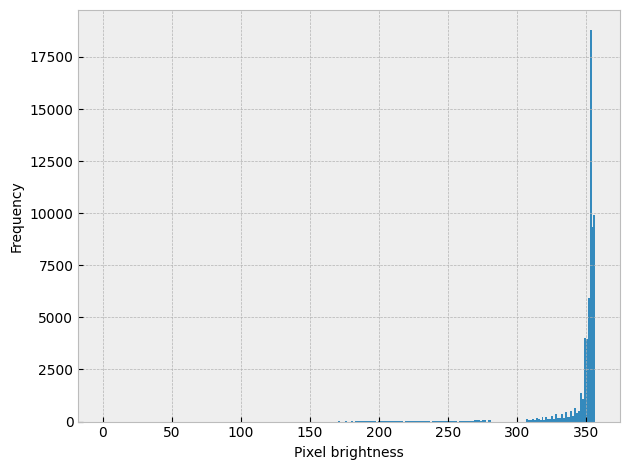

In [ ]:
# Task 5
inverted_img = inverted_img.flatten() #flattening to 1D array
plt.hist(inverted_img, bins = 256)
plt.xlabel('Pixel brightness', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)

plt.tight_layout()
plt.show()

Why are there no negative numbers? <br>
In an image, pixel values are typically represented as unsigned integers, which means they can only be non-negative. As we converted uint8 (with max of 255) into float32 and multiplied by 1.5, the values will range from 0 to 382, where 0 represents black (the darkest pixel value), and 382 represents white (the brightest pixel value). <br>

Results of inverting the image: <br>
When we invert the image by subtracting each pixel value from the maximum (382), the lowest pixel value (which is 0) becomes 382, and the highest pixel value (which is 382) becomes 0. Since the subtraction never produces a value below 0, there are no negative pixel intensities in the inverted image. <br>

For example: <br>
If the original pixel value was 200, the inverted value becomes 382 - 200 = 182. <br>
If the original pixel value was 0 (pure black), the inverted value becomes 382 - 0 = 382. <br>
If the original pixel value was 382 (pure white), the inverted value becomes 382 - 382 = 0. <br>